In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

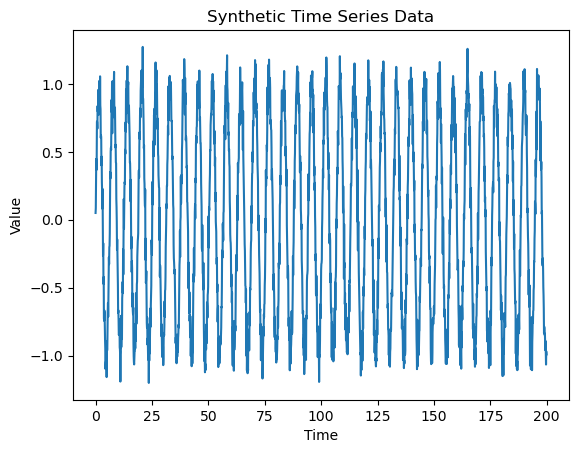

In [3]:
np.random.seed(42)
time = np.arange(0, 200, 0.1)
data = np.sin(time) + np.random.normal(0, 0.1, len(time))

plt.plot(time, data)
plt.title("Synthetic Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [4]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 20
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

X, y = create_sequences(data_scaled, window_size)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [22]:
model_rnn = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mse')
history_rnn = model_rnn.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=0)

c:\Users\Bluepal\anaconda3\envs\python_course\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model_lstm = Sequential([
    LSTM(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
history_lstm = model_lstm.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=0)

In [7]:
model_gru = Sequential([
    GRU(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])
model_gru.compile(optimizer='adam', loss='mse')
history_gru = model_gru.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=0)

In [8]:
model_stacked = Sequential([
    LSTM(50, activation='tanh', return_sequences=True, input_shape=(window_size, 1)),
    LSTM(50, activation='tanh'),
    Dense(1)
])
model_stacked.compile(optimizer='adam', loss='mse')
history_stacked = model_stacked.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=0)

In [20]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, mae, y_pred

for name, model in {
    "Simple RNN": model_rnn,
    "LSTM": model_lstm,
    "GRU": model_gru,
    "Stacked LSTM": model_stacked
}.items():
    mse, mae, y_pred = evaluate_model(model, X_test, y_test)
    print(f"{name}: MSE={mse:.4f}, MAE={mae:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Simple RNN: MSE=0.0020, MAE=0.0346
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
LSTM: MSE=0.0019, MAE=0.0339
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
GRU: MSE=0.0022, MAE=0.0374
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Stacked LSTM: MSE=0.0021, MAE=0.0363


In [19]:
y_pred_rnn = model_rnn.predict(X_test)
y_pred_lstm = model_lstm.predict(X_test)
y_pred_gru = model_gru.predict(X_test)
y_pred_stacked = model_stacked.predict(X_test)

print("Simple RNN Predictions vs Actual:")
for i in range(5):
    pred = float(y_pred_rnn[i][0])  
    actual = float(y_test[i])       
    print(f"Predicted: {pred:.4f}, Actual: {actual:.4f}")

print("\nLSTM Predictions vs Actual:")
for i in range(5):
    pred = float(y_pred_lstm[i][0])
    actual = float(y_test[i])
    print(f"Predicted: {pred:.4f}, Actual: {actual:.4f}")

print("\nGRU Predictions vs Actual:")
for i in range(5):
    pred = float(y_pred_gru[i][0])
    actual = float(y_test[i])
    print(f"Predicted: {pred:.4f}, Actual: {actual:.4f}")

print("\nStacked LSTM Predictions vs Actual:")
for i in range(5):
    pred = float(y_pred_stacked[i][0])
    actual = float(y_test[i])
    print(f"Predicted: {pred:.4f}, Actual: {actual:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Simple RNN Predictions vs Actual:
Predicted: 0.3919, Actual: 0.3943
Predicted: 0.3512, Actual: 0.3360
Predicted: 0.3145, Actual: 0.3412
Predicted: 0.2782, Actual: 0.3652
Predicted: 0.2488, Actual: 0.2777

LSTM Predictions vs Actual:
Predicted: 0.4119, Actual: 0.3943
Predicted: 0.3704, Actual: 0.3360
Predicted: 0.3266, Actual: 0.3412
Predicted: 0.2903, Actual: 0.3652
Predicted: 0.2653, Actual: 0.2777

GRU Predictions vs Actual:
Predicted: 0.4372, Actual: 0.3943
Predicted: 0.3911, Actual: 0.3360
Predicted: 0.3426, Actual: 0.3412
Predicted: 0.3064, Actual: 0.3652
Predicted: 0.2875, Actual: 0.2777

Stacked LSTM Predictions vs Actual:
Predicted: 0.4469, Actual: 0.3943
Predicted: 0.4030, Actual: 0.3360
Predicted: 0.3571, Actual: 0.3412
Predicted: 0.3143, Actual: 0.3652
Predicted: 0.2802, Actual: 0.2777


C:\Users\Bluepal\AppData\Local\Temp\ipykernel_7156\1856425180.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual = float(y_test[i])
C:\Users\Bluepal\AppData\Local\Temp\ipykernel_7156\1856425180.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual = float(y_test[i])
C:\Users\Bluepal\AppData\Local\Temp\ipykernel_7156\1856425180.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual = float(y_test[i])
C:\Users\Bluepal\AppData\Local\Temp\ipykernel_7

In [18]:
print("Shape of X_test:", X_test.shape)

for i in range(5):
    sequence = X_test[i].flatten()  
    print(f"Sequence {i+1}: {sequence}")

Shape of X_test: (396, 20, 1)
Sequence 1: [0.89461619 0.91334111 0.89650973 0.87456179 0.85193133 0.88085227
 0.82211579 0.73166014 0.84802246 0.84411504 0.68606575 0.71178873
 0.74598741 0.77013451 0.65182078 0.58390881 0.56701722 0.59016821
 0.46819488 0.42161871]
Sequence 2: [0.91334111 0.89650973 0.87456179 0.85193133 0.88085227 0.82211579
 0.73166014 0.84802246 0.84411504 0.68606575 0.71178873 0.74598741
 0.77013451 0.65182078 0.58390881 0.56701722 0.59016821 0.46819488
 0.42161871 0.39434312]
Sequence 3: [0.89650973 0.87456179 0.85193133 0.88085227 0.82211579 0.73166014
 0.84802246 0.84411504 0.68606575 0.71178873 0.74598741 0.77013451
 0.65182078 0.58390881 0.56701722 0.59016821 0.46819488 0.42161871
 0.39434312 0.33597629]
Sequence 4: [0.87456179 0.85193133 0.88085227 0.82211579 0.73166014 0.84802246
 0.84411504 0.68606575 0.71178873 0.74598741 0.77013451 0.65182078
 0.58390881 0.56701722 0.59016821 0.46819488 0.42161871 0.39434312
 0.33597629 0.34122863]
Sequence 5: [0.8519313